# Sea Level Predictor

### Assignment

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

Unit tests are written for you under `test_module.py`.

### Development

For development, you can use `main.py` to test your functions. Click the "run" button and `main.py` will run.

### Testing 

We imported the tests from `test_module.py` to `main.py` for your convenience. The tests will run automatically whenever you hit the "run" button.

### Submitting

Copy your project's URL and submit it to freeCodeCamp.

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
df = pd.read_csv("C:\\Users\\LC217BV\\Downloads\\epa-sea-level.csv")

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
Year                        134 non-null int64
CSIRO Adjusted Sea Level    134 non-null float64
Lower Error Bound           134 non-null float64
Upper Error Bound           134 non-null float64
NOAA Adjusted Sea Level     21 non-null float64
dtypes: float64(4), int64(1)
memory usage: 5.3 KB


In [5]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [9]:
def draw_plot():
    # Read data from file
    df = pd.read_csv("C:\\Users\\LC217BV\\Downloads\\epa-sea-level.csv")

    # Create scatter plot
    fig = plt.figure(figsize = (13, 7))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    x1 = list(range(1880, 2050))
    y1 = []
    for x in x1:
        y1.append(slope*x + intercept)

    # Create second line of best fit
    xnew = df[df['Year']>= 2000]['Year']
    ynew = df[df['Year']>= 2000]['CSIRO Adjusted Sea Level']
    slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(xnew,ynew)    
    x2 = list(range(2000, 2050))
    y2 = []
    for xnew in x2:
        y2.append(slope1*xnew + intercept1)
        
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.plot(x1, y1, label = 'Best Fit Line 1', color='green')
    plt.plot(x2, y2, label = 'Best Fit Line 2', color='red')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

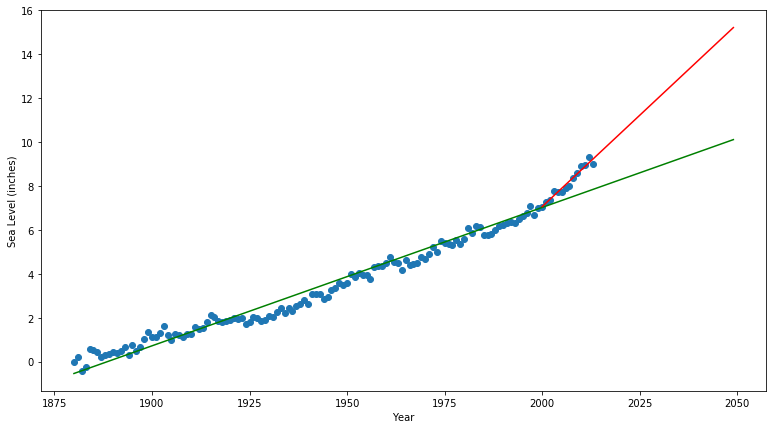

In [10]:
draw_plot()